In [16]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import umap.umap_ as umap
import warnings
from sklearn.metrics import silhouette_score
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import orthogonal_procrustes

In [3]:
base_path = "/auto/grad_space/zihend1/scENCORE/Change_Resolution/1000K/"

In [21]:
embedding_size = 128
metacell = 200

In [45]:
# cell_type = "Exc"
cell_type = "Mic"

In [46]:
CON_emb = np.load(base_path+"3_CON/cell_type/"+cell_type+"/"+str(metacell)+"_metacell/Embedding/corr_0_1_VERSE_"+str(embedding_size)+".npy")
MDD_emb = np.load(base_path+"2_MDD/cell_type/"+cell_type+"/"+str(metacell)+"_metacell/Embedding/corr_0_1_VERSE_"+str(embedding_size)+".npy")
PTSD_emb = np.load(base_path+"2_PTSD/cell_type/"+cell_type+"/"+str(metacell)+"_metacell/Embedding/corr_0_1_VERSE_"+str(embedding_size)+".npy")

CON_feature = np.load("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/Cross-Sample/1000K_resolution/3_CON/cell_type/"+cell_type+"/raw/feature.npy")
MDD_feature = np.load("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/Cross-Sample/1000K_resolution/2_MDD/cell_type/"+cell_type+"/raw/feature.npy")
PTSD_feature = np.load("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/Cross-Sample/1000K_resolution/2_PTSD/cell_type/"+cell_type+"/raw/feature.npy")

R, _ = orthogonal_procrustes(PTSD_emb, CON_emb)
transfer_PTSD_emb = PTSD_emb @ R

R, _ = orthogonal_procrustes(MDD_emb, CON_emb)
transfer_MDD_emb = MDD_emb @ R

Control  Exc
0.0913392
0.6651511


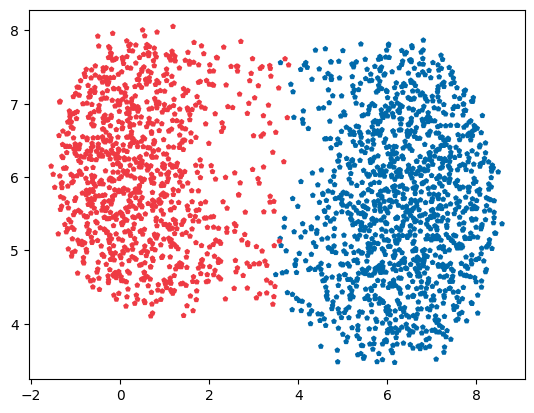

In [39]:
embedding = CON_emb
adata = ad.AnnData(embedding)
sc.pp.neighbors(adata, n_neighbors=100, use_rep='X')
sc.tl.leiden(adata,resolution=0.5)
sc.tl.umap(adata)
print("Control ", cell_type)
print(silhouette_score(X=embedding, labels=adata.obs['leiden']))
print(silhouette_score(X=adata.obsm['X_umap'], labels=adata.obs['leiden']))
abclass = np.array(adata.obs['leiden'])
color_list = []
for i in range(len(adata.obs['leiden'])):
    if (adata.obs['leiden'][i]) == '0':
        color_list.append('#0069aa')
    else:
        color_list.append('#ee3a43')
pos = np.array(adata.obsm['X_umap'])
plt.scatter(pos[:2359,0], pos[:2359,1], c=color_list[:2359], s=10, marker="p")
plt.savefig("./figure/CON_"+cell_type+"_200_metacell_umap.eps",dpi=300,format='eps')
plt.show()

MDD  Mic
0.16011101
0.7946436


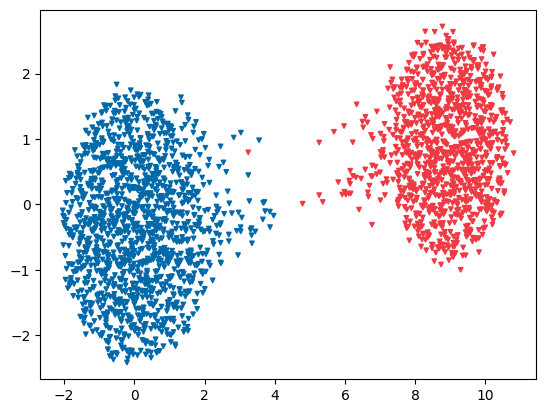

In [47]:
embedding = MDD_emb
adata = ad.AnnData(embedding)
sc.pp.neighbors(adata, n_neighbors=100, use_rep='X')
sc.tl.leiden(adata,resolution=0.5)
sc.tl.umap(adata)
print("MDD ", cell_type)
print(silhouette_score(X=embedding, labels=adata.obs['leiden']))
print(silhouette_score(X=adata.obsm['X_umap'], labels=adata.obs['leiden']))
abclass = np.array(adata.obs['leiden'])
color_list = []
for i in range(len(adata.obs['leiden'])):
    if (adata.obs['leiden'][i]) == '0':
        color_list.append('#0069aa')
    else:
        color_list.append('#ee3a43')
pos = np.array(adata.obsm['X_umap'])
plt.scatter(pos[:2359,0], pos[:2359,1], c=color_list[:2359], s=10, marker="v")
plt.savefig("./figure/MDD_"+cell_type+"_200_metacell_umap.eps",dpi=300,format='eps')
plt.show()

CON MDD align  Exc
0.08672959
0.6730479


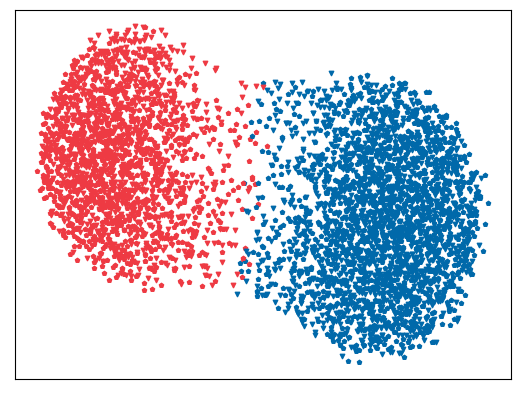

In [41]:
embedding = np.vstack((CON_emb, transfer_MDD_emb))
adata = ad.AnnData(embedding)
sc.pp.neighbors(adata, n_neighbors=100, use_rep='X')
sc.tl.leiden(adata,resolution=0.5)
sc.tl.umap(adata)

print("CON MDD align ", cell_type)
print(silhouette_score(X=embedding, labels=adata.obs['leiden']))
print(silhouette_score(X=adata.obsm['X_umap'], labels=adata.obs['leiden']))

pos = np.array(adata.obsm['X_umap'])
color_array = np.array(adata.obs["leiden"], dtype=np.int32)
total_feature = np.hstack((np.sum(CON_feature, axis=0), np.sum(PTSD_feature, axis=0)))

color_list = []
size_list = []
linewidths_list = []


for i in range(color_array.shape[0]):
    if color_array[i] == 1:
        color_list.append("#ee3a43")
    else:
        color_list.append("#0069aa")

edgecolors_list = color_list
non_color_list = ['none' for i in range(color_array.shape[0])]

for i in range(color_array.shape[0]):
    if i<2329:
        plt.scatter(pos[i,0], pos[i,1], s=10, color=color_list[i], marker="p")
    else:
        plt.scatter(pos[i,0], pos[i,1], s=10, color=color_list[i], marker="v")

plt.savefig("./figure/CON_MDD_align_"+cell_type+"_200_metacell_umap.eps",dpi=300,format='eps')

plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.show()

PTSD  Exc
0.067179106
0.5852835


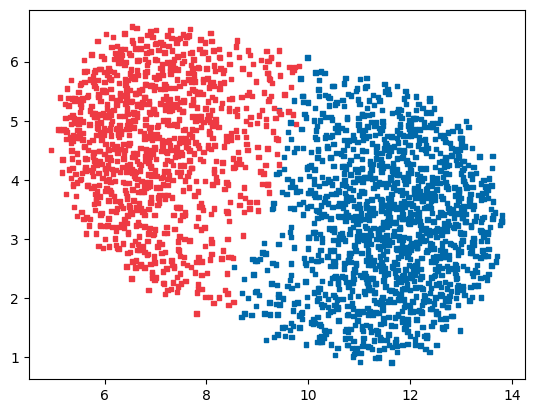

In [42]:
embedding = PTSD_emb
adata = ad.AnnData(embedding)
sc.pp.neighbors(adata, n_neighbors=100, use_rep='X')
sc.tl.leiden(adata,resolution=0.5)
sc.tl.umap(adata)
print("PTSD ", cell_type)
print(silhouette_score(X=embedding, labels=adata.obs['leiden']))
print(silhouette_score(X=adata.obsm['X_umap'], labels=adata.obs['leiden']))
abclass = np.array(adata.obs['leiden'])
color_list = []
for i in range(len(adata.obs['leiden'])):
    if (adata.obs['leiden'][i]) == '0':
        color_list.append('#0069aa')
    else:
        color_list.append('#ee3a43')
pos = np.array(adata.obsm['X_umap'])
plt.scatter(pos[:2359,0], pos[:2359,1], c=color_list[:2359], s=10, marker="s")
plt.savefig("./figure/PTSD_"+cell_type+"_200_metacell_umap.eps",dpi=300,format='eps')
plt.show()

CON PTSD align  Exc
0.07897896
0.64596814


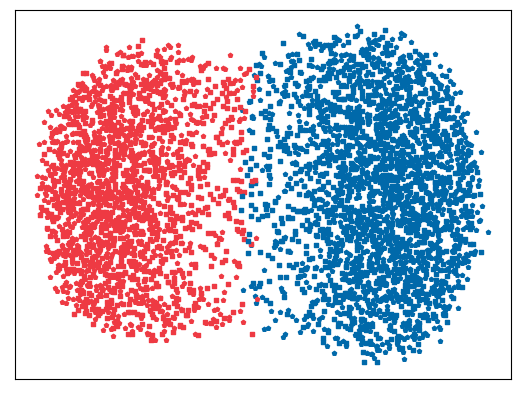

In [43]:
embedding = np.vstack((CON_emb, transfer_PTSD_emb))
adata = ad.AnnData(embedding)
sc.pp.neighbors(adata, n_neighbors=100, use_rep='X')
sc.tl.leiden(adata,resolution=0.5)
sc.tl.umap(adata)

print("CON PTSD align ", cell_type)
print(silhouette_score(X=embedding, labels=adata.obs['leiden']))
print(silhouette_score(X=adata.obsm['X_umap'], labels=adata.obs['leiden']))

pos = np.array(adata.obsm['X_umap'])
color_array = np.array(adata.obs["leiden"], dtype=np.int32)
total_feature = np.hstack((np.sum(CON_feature, axis=0), np.sum(PTSD_feature, axis=0)))

color_list = []
size_list = []
linewidths_list = []


for i in range(color_array.shape[0]):
    if color_array[i] == 1:
        color_list.append("#ee3a43")
    else:
        color_list.append("#0069aa")

edgecolors_list = color_list
non_color_list = ['none' for i in range(color_array.shape[0])]

for i in range(color_array.shape[0]):
    if i<2329:
        plt.scatter(pos[i,0], pos[i,1], s=10, color=color_list[i], marker="p")
    else:
        plt.scatter(pos[i,0], pos[i,1], s=10, color=color_list[i], marker="s")

plt.savefig("./figure/CON_PTSD_align_"+cell_type+"_200_metacell_umap.eps",dpi=300,format='eps')

plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.show()